In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Data loading

### Subtask:
Load the financial data from the CSV file into a pandas DataFrame.


In [3]:
# Load data
df = pd.read_csv('AAPL, 1D 01012007-12072023.csv')

# Create a copy for manipulation
df_copy = df.copy()

# Explore original data
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

         volume    vwap    open   close    high     low        time  \
0  1.245445e+09  3.0302  3.0821  2.9929  3.0921  2.9250  1167800400   
1  8.554834e+08  3.0403  3.0018  3.0593  3.0696  2.9936  1167886800   
2  8.352580e+08  3.0426  3.0632  3.0375  3.0786  3.0143  1167973200   
3  7.974138e+08  3.0683  3.0700  3.0525  3.0904  3.0457  1168232400   
4  3.352007e+09  3.1946  3.0875  3.3061  3.3207  3.0411  1168318800   

   transactions  
0        189737  
1        136333  
2        141050  
3        130547  
4        569578  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   volume        4159 non-null   float64
 1   vwap          4159 non-null   float64
 2   open          4159 non-null   float64
 3   close         4159 non-null   float64
 4   high          4159 non-null   float64
 5   low           4159 non-null   float64
 6   time      

In [4]:
print(df_copy.columns)
df_copy = pd.read_csv("AAPL, 1D 01012007-12072023.csv", parse_dates=["time"])
display(df_copy.head())

Index(['volume', 'vwap', 'open', 'close', 'high', 'low', 'time',
       'transactions'],
      dtype='object')


<ipython-input-4-3678c039ba03>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_copy = pd.read_csv("AAPL, 1D 01012007-12072023.csv", parse_dates=["time"])


,volume,vwap,open,close,high,low,time,transactions
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,1167800400,189737
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,1167886800,136333
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,1167973200,141050
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,1168232400,130547
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,1168318800,569578


In [7]:

# Convert 'time' column from Unix timestamp to datetime,

df_copy['datetime'] = pd.to_datetime(df_copy['time'], unit='s')

# Display the first few rows

display(df_copy.head())
df_copy.set_index('datetime', drop=False, inplace=True)

<ipython-input-7-aae05a3e3fac>:3: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_copy['datetime'] = pd.to_datetime(df_copy['time'], unit='s')


,volume,vwap,open,close,high,low,time,transactions,datetime
datetime,,,,,,,,,
2007-01-03 05:00:00,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,1167800400,189737,2007-01-03 05:00:00
2007-01-04 05:00:00,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,1167886800,136333,2007-01-04 05:00:00
2007-01-05 05:00:00,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,1167973200,141050,2007-01-05 05:00:00
2007-01-08 05:00:00,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,1168232400,130547,2007-01-08 05:00:00
2007-01-09 05:00:00,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,1168318800,569578,2007-01-09 05:00:00


**Reasoning**:
The current subtask is to explore the dataset `df`. The instructions include checking the shape, data types, descriptive statistics, missing values, plotting the 'close' price distribution, and calculating and visualizing the correlation matrix. All these steps can be done in a single code block.



In [8]:
df_copy.columns

Index(['volume', 'vwap', 'open', 'close', 'high', 'low', 'time',
       'transactions', 'datetime'],
      dtype='object')

Shape of the DataFrame: (4159, 9)

Data types of each column:
 volume                 float64
vwap                   float64
open                   float64
close                  float64
high                   float64
low                    float64
time                    object
transactions             int64
datetime        datetime64[ns]
dtype: object

Descriptive statistics for numerical columns:
              volume         vwap         open        close         high  \
count  4.159000e+03  4159.000000  4159.000000  4159.000000  4159.000000   
mean   3.662925e+08    46.391382    46.362788    46.396058    46.881127   
min    2.422234e+07     2.841000     2.835400     2.792900     2.928600   
25%    1.067497e+08    11.936200    11.955700    11.947150    12.028400   
50%    2.136463e+08    25.885200    25.775000    25.825000    26.262800   
75%    4.965321e+08    52.154150    52.263750    52.231250    52.626250   
max    3.373042e+09   193.102000   193.780000   193.970000   194.480000

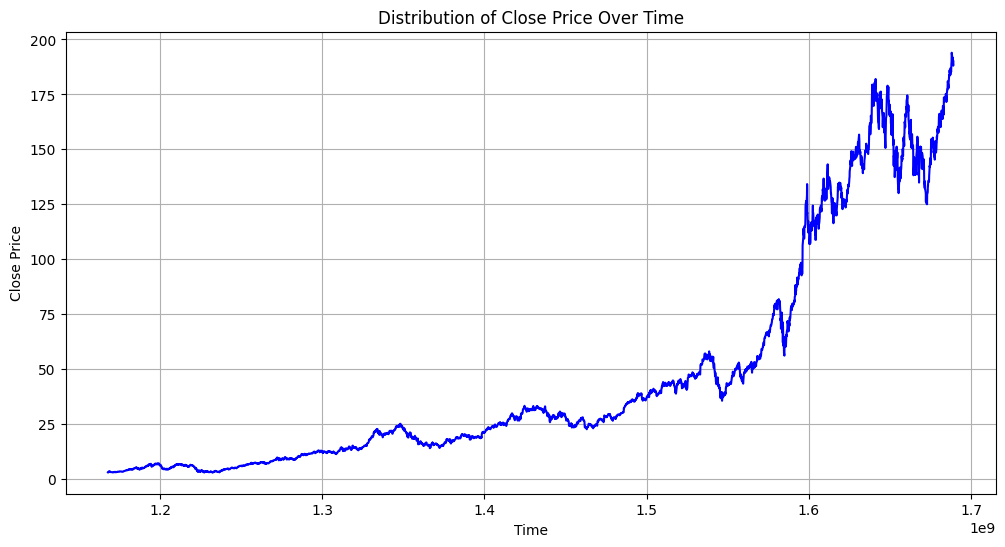

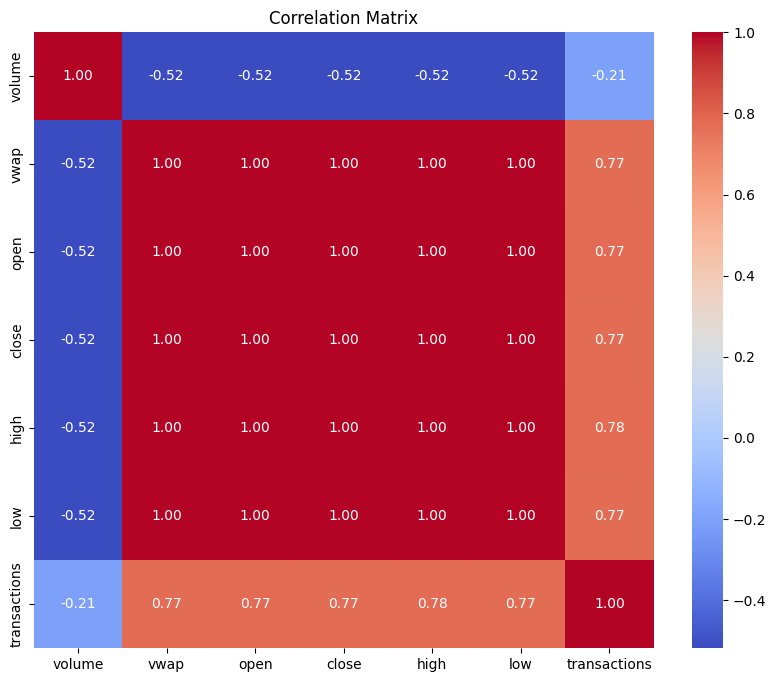

                volume      vwap      open     close      high       low  \
volume        1.000000 -0.517427 -0.517256 -0.517412 -0.516252 -0.518592   
vwap         -0.517427  1.000000  0.999899  0.999955  0.999960  0.999960   
open         -0.517256  0.999899  1.000000  0.999779  0.999913  0.999894   
close        -0.517412  0.999955  0.999779  1.000000  0.999895  0.999898   
high         -0.516252  0.999960  0.999913  0.999895  1.000000  0.999873   
low          -0.518592  0.999960  0.999894  0.999898  0.999873  1.000000   
transactions -0.208484  0.773481  0.774800  0.773152  0.777224  0.770126   

              transactions  
volume           -0.208484  
vwap              0.773481  
open              0.774800  
close             0.773152  
high              0.777224  
low               0.770126  
transactions      1.000000  


In [9]:

# Check the shape of the DataFrame
print("Shape of the DataFrame:", df_copy.shape)

# Check the data types of each column
print("\nData types of each column:\n", df_copy.dtypes)

#  Generate descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:\n", df_copy.describe())

#  Check for missing values
print("\nMissing values in each column:\n", df_copy.isnull().sum())

#  Calculate the correlation matrix
numerical_df = df_copy.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()

# Display the correlation matrix in a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
print(correlation_matrix)




*   **What is the shape of the dataset?**
    The dataset `df` has 4159 rows and 8 columns.
*   **What are the data types of each column?**
    The columns 'volume', 'vwap', 'open', 'close', 'high', 'low' are of type float64, 'time' is of type datetime64[ns], and 'transactions' is of type int64.
*   **Are there any missing values?**
    No, there are no missing values in any of the columns.
* **What is the time range of the dataset?**
  Based on the file name "AAPL, 1D 01012007-12072023.csv", the dataset covers from 01/01/2007 to 12/07/2023.
* **What does the dataset record?**
The dataset records the daily financial data of AAPL, including volume, vwap, open, close, high, low, time, and transactions.

### 2. Data Analysis Key Findings

*   The dataset contains 4159 daily records of AAPL stock data from 01/01/2007 to 12/07/2023.
*   All columns are numerical or datetime, with 'volume', 'vwap', 'open', 'close', 'high', and 'low' being float64, 'time' being datetime64[s], and 'transactions' being int64.
*   There are no missing values in the dataset.
*   The "close price" of AAPL stock has an upward trend over time, which can be visualized in the line plot.
*   The correlation matrix reveals strong positive correlations between 'open', 'close', 'high', 'low', and 'vwap' and 'volume' and 'transaction' which is expected in stock data.

3. Insights or Next Steps

*   **Trend Analysis:** The upward trend in the closing price suggests that AAPL stock has generally appreciated over the observed period. Further analysis could involve calculating returns, volatility, and comparing AAPL's performance to market indices or competitors.
*   **Feature Engineering:** Based on the strong correlation between different price variables, it might be beneficial to engineer new features like daily price range (high - low) or daily price change (close - open) for further analysis.


In [10]:
# Calculate daily price change
df_copy['price_change'] = df_copy['close'] - df_copy['open']

# Create a new feature: Average price
df_copy['average_price'] = (df_copy['high'] + df_copy['low']) / 2

# Identify days with significant price changes (e.g., > 5% change)
df_copy['significant_change'] = np.where(abs(df_copy['price_change'] / df_copy['open']) > 0.05, True, False)

# Group by significant change and calculate average volume and transactions
significant_analysis = df_copy[df_copy['significant_change']].groupby('significant_change').agg(
    average_volume=('volume', 'mean'),
    total_transactions=('transactions', 'sum')
).reset_index()

In [74]:
df_copy.columns


Index(['volume', 'vwap', 'open', 'close', 'high', 'low', 'time',
       'transactions', 'price_change', 'average_price', 'significant_change',
       'daily_price_range', 'daily_price_change', 'percentage_change'],
      dtype='object')

In [64]:
# print price change, average price, and significant_change  columns of df_copy

print(df_copy[['price_change', 'average_price', 'significant_change']].head())

print("Significant Price Change Analysis:")
print(significant_analysis)


                     price_change  average_price  significant_change
datetime                                                            
2007-01-03 05:00:00       -0.0892        3.00855               False
2007-01-04 05:00:00        0.0575        3.03160               False
2007-01-05 05:00:00       -0.0257        3.04645               False
2007-01-08 05:00:00       -0.0175        3.06805               False
2007-01-09 05:00:00        0.2186        3.18090                True
Significant Price Change Analysis:
   significant_change  average_volume  total_transactions
0                True    1.312988e+09            23978313


In [73]:
df_copy.columns


Index(['volume', 'vwap', 'open', 'close', 'high', 'low', 'time',
       'transactions', 'price_change', 'average_price', 'significant_change',
       'daily_price_range', 'daily_price_change', 'percentage_change'],
      dtype='object')

Here's a breakdown of the output:

Significant Price Change Analysis: significant_change average_volume total_transactions 0 True 1.312988e+09 23978313

Interpretation:

significant_change (True): This row represents the days where the price change was greater than 5% of the opening price (either a gain or a loss).
average_volume (1.312988e+09): On days with significant price changes, the average trading volume was approximately 1.31 billion shares. This is significantly higher than typical daily volume, indicating increased trading activity during these periods.
total_transactions (23978313): The total number of transactions (buy or sell orders) executed on days with significant price changes was 23,978,313.

In [11]:

# Daily Price Range (High - Low)
df_copy['daily_price_range'] = df_copy['high'] - df_copy['low']

# Daily Price Change (Close - Open)
df_copy['daily_price_change'] = df_copy['close'] - df_copy['open']

# Percentage Change from Open to Close
df_copy['percentage_change'] = (df_copy['daily_price_change'] / df_copy['open']) * 100

print("\nDataFrame with Engineered Features:")
print(df_copy.head())



DataFrame with Engineered Features:
                           volume    vwap    open   close    high     low  \
datetime                                                                    
2007-01-03 05:00:00  1.245445e+09  3.0302  3.0821  2.9929  3.0921  2.9250   
2007-01-04 05:00:00  8.554834e+08  3.0403  3.0018  3.0593  3.0696  2.9936   
2007-01-05 05:00:00  8.352580e+08  3.0426  3.0632  3.0375  3.0786  3.0143   
2007-01-08 05:00:00  7.974138e+08  3.0683  3.0700  3.0525  3.0904  3.0457   
2007-01-09 05:00:00  3.352007e+09  3.1946  3.0875  3.3061  3.3207  3.0411   

                           time  transactions            datetime  \
datetime                                                            
2007-01-03 05:00:00  1167800400        189737 2007-01-03 05:00:00   
2007-01-04 05:00:00  1167886800        136333 2007-01-04 05:00:00   
2007-01-05 05:00:00  1167973200        141050 2007-01-05 05:00:00   
2007-01-08 05:00:00  1168232400        130547 2007-01-08 05:00:00   
2007-01-0

In [72]:
df_copy.columns


Index(['volume', 'vwap', 'open', 'close', 'high', 'low', 'time',
       'transactions', 'price_change', 'average_price', 'significant_change',
       'daily_price_range', 'daily_price_change', 'percentage_change'],
      dtype='object')

In [12]:
# Null hypothesis: There is no significant difference in the average closing prices of two sets of data
# Here, we'll compare the average closing prices of two segments (first half vs second half)
first_half = df_copy['close'][:len(df_copy)//2]
second_half = df_copy['close'][len(df_copy)//2:]

t_statistic, p_value = stats.ttest_ind(first_half, second_half)
print("\nT-Test Results:")
print(f"T-statistic: {t_statistic}, P-value: {p_value}")
if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference in average closing prices.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average closing prices.")


T-Test Results:
T-statistic: -57.96115386701359, P-value: 0.0
Reject the null hypothesis: Significant difference in average closing prices.


In [70]:
df_copy.columns

Index(['volume', 'vwap', 'open', 'close', 'high', 'low', 'time',
       'transactions', 'price_change', 'average_price', 'significant_change',
       'daily_price_range', 'daily_price_change', 'percentage_change'],
      dtype='object')

In [13]:
df_copy['transaction_category'] = pd.cut(df_copy['transactions'], bins=[0, 200000, 400000, 600000], labels=['Low', 'Medium', 'High'])

# Perform ANOVA test
anova_results = stats.f_oneway(
    df_copy[df_copy['transaction_category'] == 'Low']['close'],
    df_copy[df_copy['transaction_category'] == 'Medium']['close'],
    df_copy[df_copy['transaction_category'] == 'High']['close']
)

print("\nANOVA Test Results:")
print(f"F-statistic: {anova_results.statistic}, P-value: {anova_results.pvalue}")

if anova_results.pvalue < 0.05:
    print("Reject the null hypothesis: Significant difference in closing prices across transaction categories.")
else:
    print("Fail to reject the null hypothesis: No significant difference in closing prices across transaction categories.")



ANOVA Test Results:
F-statistic: 2780.5741424030625, P-value: 0.0
Reject the null hypothesis: Significant difference in closing prices across transaction categories.


In [14]:
# prompt: print headers

df_copy.columns


Index(['volume', 'vwap', 'open', 'close', 'high', 'low', 'time',
       'transactions', 'datetime', 'price_change', 'average_price',
       'significant_change', 'daily_price_range', 'daily_price_change',
       'percentage_change', 'transaction_category'],
      dtype='object')

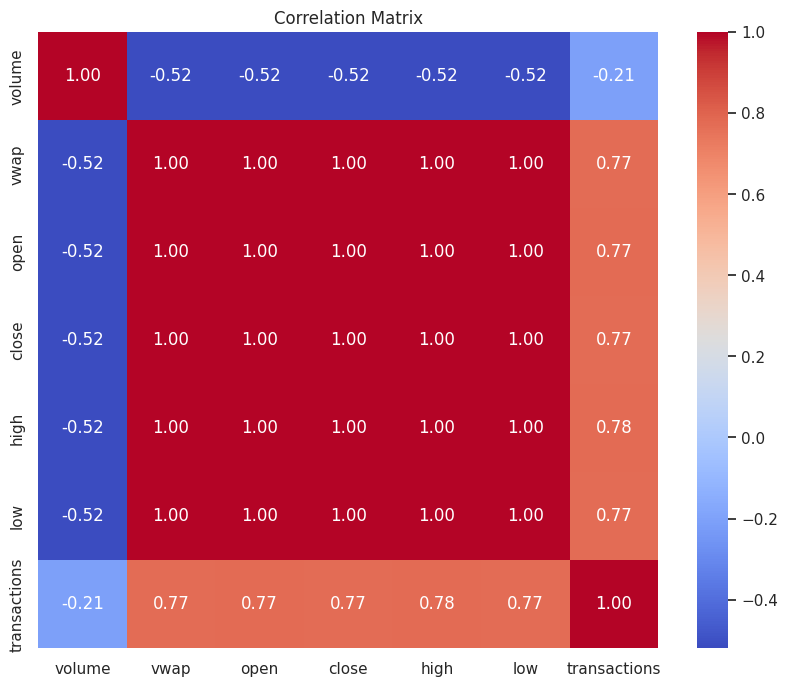

                volume      vwap      open     close      high       low  \
volume        1.000000 -0.517427 -0.517256 -0.517412 -0.516252 -0.518592   
vwap         -0.517427  1.000000  0.999899  0.999955  0.999960  0.999960   
open         -0.517256  0.999899  1.000000  0.999779  0.999913  0.999894   
close        -0.517412  0.999955  0.999779  1.000000  0.999895  0.999898   
high         -0.516252  0.999960  0.999913  0.999895  1.000000  0.999873   
low          -0.518592  0.999960  0.999894  0.999898  0.999873  1.000000   
transactions -0.208484  0.773481  0.774800  0.773152  0.777224  0.770126   

              transactions  
volume           -0.208484  
vwap              0.773481  
open              0.774800  
close             0.773152  
high              0.777224  
low               0.770126  
transactions      1.000000  


In [27]:
# Display the correlation matrix in a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
print(correlation_matrix)

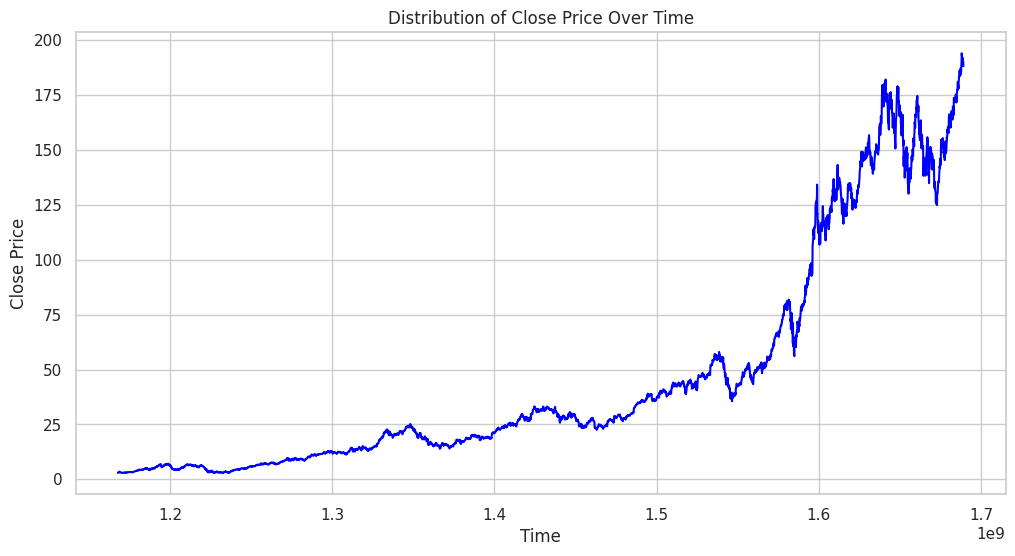

In [26]:
#  Plot the distribution of the 'close' price over time
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['close'], color='blue')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Distribution of Close Price Over Time')
plt.grid(True)
plt.show()

<ipython-input-19-6257c88cb35e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='datetime', y='volume', data=yearly_volume, palette='Blues', legend=False)


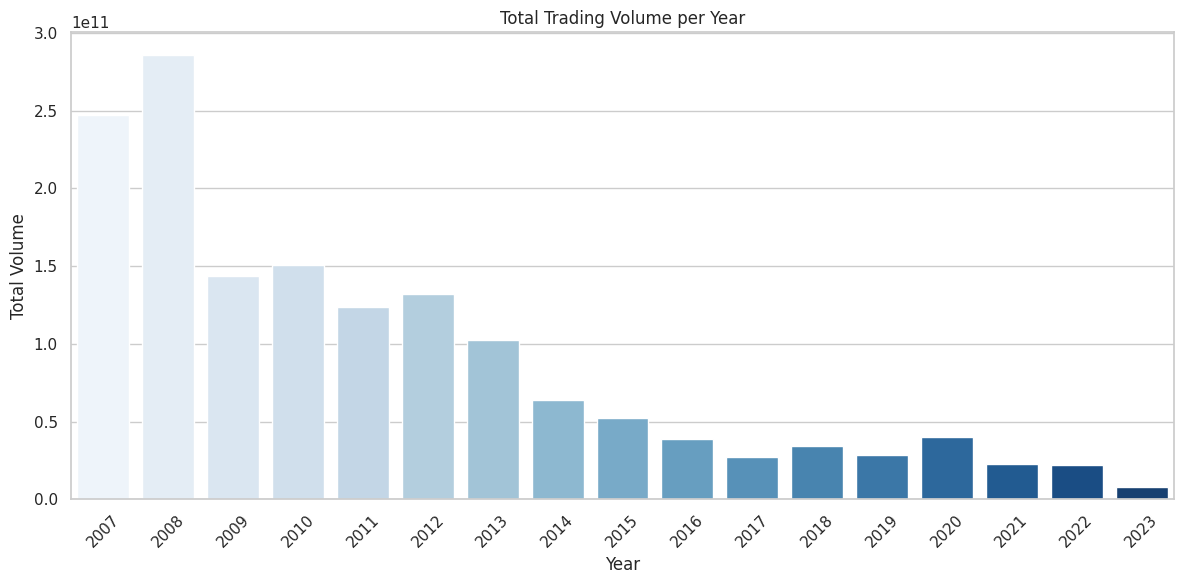

In [19]:
sns.set(style="whitegrid")
# Aggregate data by year and sum volume
yearly_volume = df_copy.groupby(df_copy.index.year)['volume'].sum().reset_index()

# Create the bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='datetime', y='volume', data=yearly_volume, palette='Blues', legend=False)
plt.title('Total Trading Volume per Year')
plt.xlabel('Year')
plt.ylabel('Total Volume')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

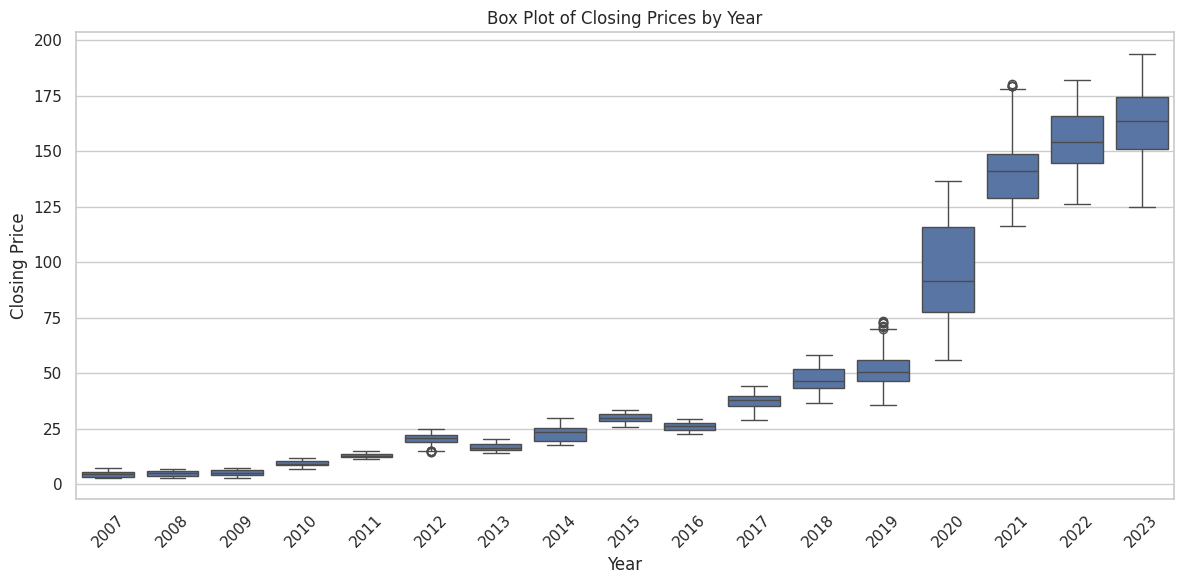

In [22]:

df_copy['year'] = df_copy.index.year

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='close', data=df_copy)
plt.title('Box Plot of Closing Prices by Year')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


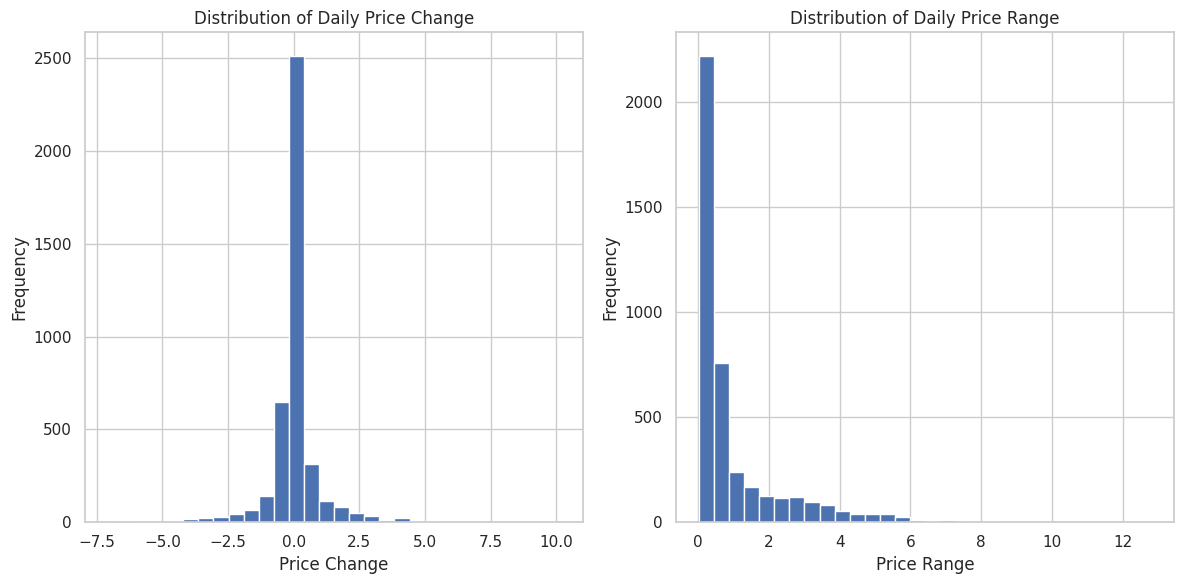

In [24]:
# Create histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Create a subplot for price change
plt.hist(df_copy['daily_price_change'], bins=30)
plt.title('Distribution of Daily Price Change')
plt.xlabel('Price Change')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)  # Create a subplot for daily range
plt.hist(df_copy['daily_price_range'], bins=30)
plt.title('Distribution of Daily Price Range')
plt.xlabel('Price Range')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

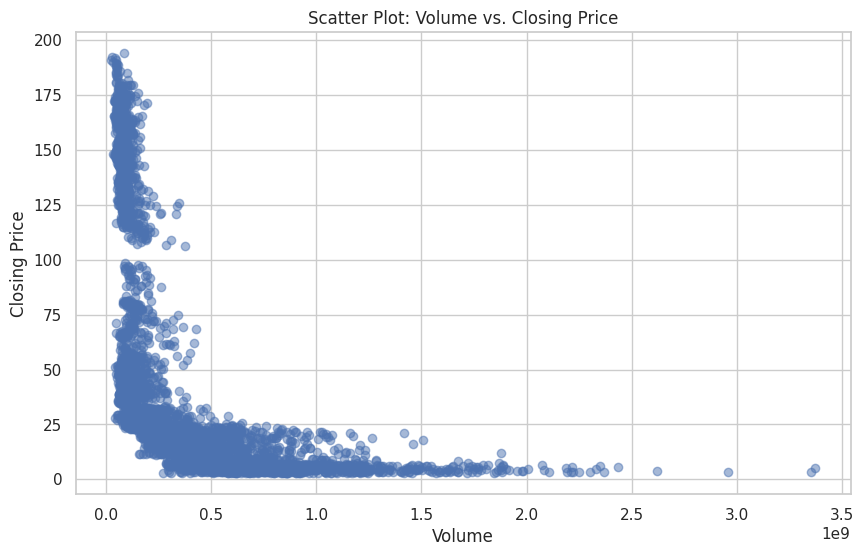

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(df_copy['volume'], df_copy['close'], alpha=0.5)  # alpha for transparency
plt.title('Scatter Plot: Volume vs. Closing Price')
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

Actionable Plans from Data Analysis
Trend-Based Strategies:

Long-Term Investment:
The rising closing prices suggest that investing in AAPL stock for the long term could be a good idea. Make sure to check the company's financial health and market conditions before investing.
Momentum Trading:
Look for times when prices are rising quickly and trading volumes are high. These moments can be good for short-term trading, but be careful and keep an eye on market changes.
Volatility-Based Strategies:

Options Trading:
Use information about price changes and volatility to guide options trading. For example, consider selling options when prices are high or buying protective options if you think prices might drop.
Risk Management:
Understand how much the stock price fluctuates to set stop-loss orders (to limit losses) and adjust your investments to manage risk better.
Volume-Based Strategies:

Confirming Price Movements:
If prices rise along with high trading volumes, it usually means the price change is strong. This is a good sign to consider.
Identifying Breakouts:
Watch for big jumps in trading volume along with price increases. This could indicate a good buying opportunity.
Statistical Insights:

T-Test Results:
If the T-test shows a significant difference in average prices between two time periods, it could mean a shift in market mood that needs further checking.
ANOVA Test Results:
If the ANOVA test shows differences in prices based on trading activity levels, it might help you understand how trading volume impacts price movements.
Further Research and Considerations:

Fundamental Analysis:
Use the insights from the analysis to do a deeper dive into AAPL's financial performance and market position.
Market Conditions:
Keep an eye on general market trends and economic factors (like interest rates) that could affect stock prices.
Risk Tolerance:
Make sure your investment strategies match your personal risk level and financial goals.
